# EXERCICE 1

In [1]:
import pandas as pd

file_path = 'weather_data_transformed.csv'
data = pd.read_csv(file_path)


In [2]:
X = data.drop(columns=['Temperature'])  
y = data['Temperature']  

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
                  Date  Precipitation  Humidity   Latitude   Longitude  \
0  2023-01-01 12:00:00              0      33.1  30.828749  -71.000954   
1  2023-01-01 21:00:00              0      52.3  82.762384  -19.613587   
2  2023-01-02 04:00:00              0      56.7 -19.278880 -106.536820   
3  2023-01-03 00:00:00              0      60.7 -23.008814  -34.082870   
4  2023-01-03 10:00:00              0      53.7 -20.029257  174.475612   

   Temperature_F  Is_Hot  Temperature_Fahrenheit  
0          58.64       0                   58.64  
1          47.12       0                   47.12  
2          58.28       0                   58.28  
3          45.50       0                   45.50  
4          57.38       0                   57.38  

Target (y):
0    14.8
1     8.4
2    14.6
3     7.5
4    14.1
Name: Temperature, dtype: float64


In [3]:
from sklearn.preprocessing import StandardScaler

In [5]:
if 'date_column_name' in data.columns:  # Remplacez par le nom réel de la colonne
    data['date_column_name'] = pd.to_datetime(data['date_column_name'])
    # Vous pouvez extraire des informations pertinentes
    data['year'] = data['date_column_name'].dt.year
    data['month'] = data['date_column_name'].dt.month
    data['day'] = data['date_column_name'].dt.day
    data = data.drop(columns=['date_column_name'])  # Supprime la colonne d'origine


X = data.drop(columns=['Temperature'])
y = data['Temperature']

X = X.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Données normalisées (X_scaled):")
print(X_scaled.head())


Données normalisées (X_scaled):
   Precipitation  Humidity  Latitude  Longitude  Temperature_F    Is_Hot  \
0      -0.421411 -1.198979  0.656868  -0.677701       0.392942 -0.304789   
1      -0.421411  0.038504  1.674299  -0.181251      -0.198964 -0.304789   
2      -0.421411  0.322094 -0.324790  -1.021010       0.374445 -0.304789   
3      -0.421411  0.579902 -0.397863  -0.321038      -0.282200 -0.304789   
4      -0.421411  0.128737 -0.339491   1.693830       0.328203 -0.304789   

   Temperature_Fahrenheit  
0                0.392942  
1               -0.198964  
2                0.374445  
3               -0.282200  
4                0.328203  


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

print("Le modèle de régression linéaire a été entraîné avec succès.")


Le modèle de régression linéaire a été entraîné avec succès.


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"l'erreur quadratique moyenne entre les prédictions (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


l'erreur quadratique moyenne entre les prédictions (RMSE): 0.00
R² Score: 1.00


# EXERCICE 2

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger les données
file_path = 'weather_data_transformed.csv'
data = pd.read_csv(file_path)

# Sélectionner les colonnes pertinentes
columns = ['Temperature', 'Precipitation']  # Ajoutez d'autres colonnes pertinentes si nécessaire
clustering_data = data[columns]

# Normaliser les données
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

print("Données normalisées prêtes pour le clustering.")


Données normalisées prêtes pour le clustering.


In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_data_scaled)

data['Cluster'] = kmeans.labels_

print("Clusters obtenus :")
print(data[['Temperature', 'Precipitation', 'Cluster']].head())


Clusters obtenus :
   Temperature  Precipitation  Cluster
0         14.8              0        0
1          8.4              0        1
2         14.6              0        0
3          7.5              0        1
4         14.1              0        0


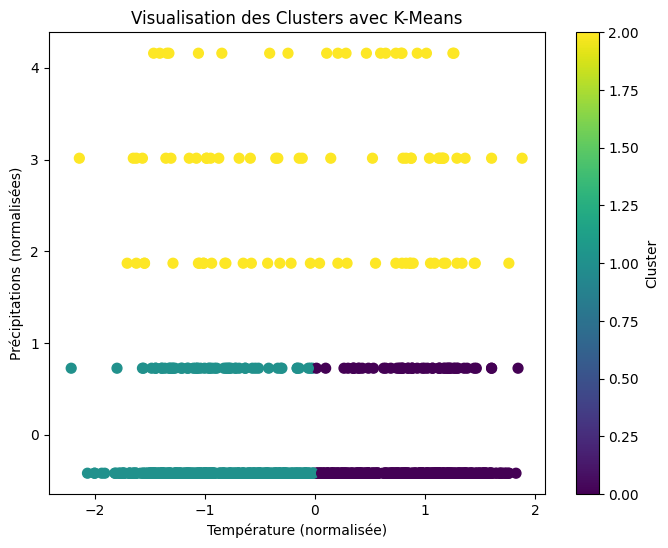

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    clustering_data_scaled[:, 0],  
    clustering_data_scaled[:, 1],  
    c=kmeans.labels_,             
    cmap='viridis',
    s=50
)
plt.title("Visualisation des Clusters avec K-Means")
plt.xlabel("Température (normalisée)")
plt.ylabel("Précipitations (normalisées)")
plt.colorbar(scatter, label='Cluster')
plt.show()
